##Problem statement: 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Defining the path for train and test images
# Update the paths of the train and test dataset
data_dir_train = pathlib.Path("data/Train")
data_dir_test = pathlib.Path('data/Test')

In [3]:
# Printing the count of images in each directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)

Train images:	 2239
Test images:	 118


# Loading data using Keras. preprocessing


### Data Reading/Data Understanding 
#### Dataset out of images
#### Defining Parameters for loader

In [4]:
batch_size=32
img_height=180
img_width=180

In [5]:
# Spliting data - 80% for training and 20% for validating 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualizing and Exploring the data 

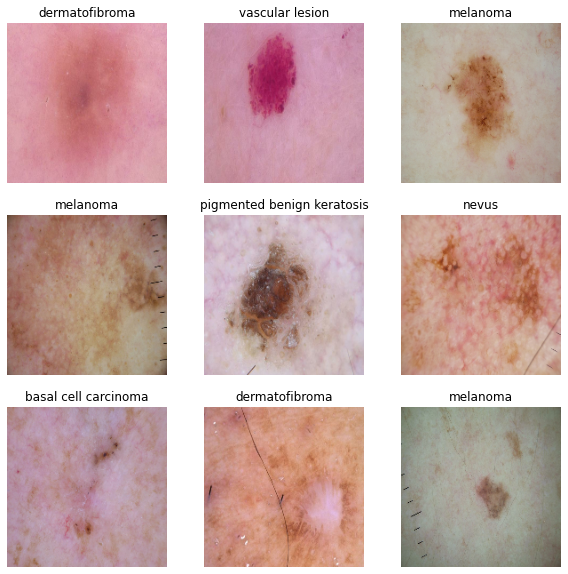

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

- Batch of 32 Images of shape 180x180x3

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model Building & training

In [10]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [11]:
# compile  the model 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [13]:
# Train the Model 
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 65s 342ms/step - loss: 1.7921 - accuracy: 0.3188 - val_loss: 1.4760 - val_accuracy: 0.4380
Epoch 2/20
169/169 [==============================] - 56s 333ms/step - loss: 1.4279 - accuracy: 0.4614 - val_loss: 1.3143 - val_accuracy: 0.5048
Epoch 3/20
169/169 [==============================] - 58s 346ms/step - loss: 1.2332 - accuracy: 0.5428 - val_loss: 1.1208 - val_accuracy: 0.5895
Epoch 4/20
169/169 [==============================] - 57s 338ms/step - loss: 1.0210 - accuracy: 0.6272 - val_loss: 1.1407 - val_accuracy: 0.5887
Epoch 5/20
169/169 [==============================] - 54s 318ms/step - loss: 0.8769 - accuracy: 0.6927 - val_loss: 1.2111 - val_accuracy: 0.5872
Epoch 6/20
169/169 [==============================] - 56s 334ms/step - loss: 0.6879 - accuracy: 0.7506 - val_loss: 0.8783 - val_accuracy: 0.7001
Epoch 7/20
169/169 [==============================] - 54s 318ms/step - loss: 0.5312 - accuracy: 0.8177 - val_loss: 0.7943 - val_ac

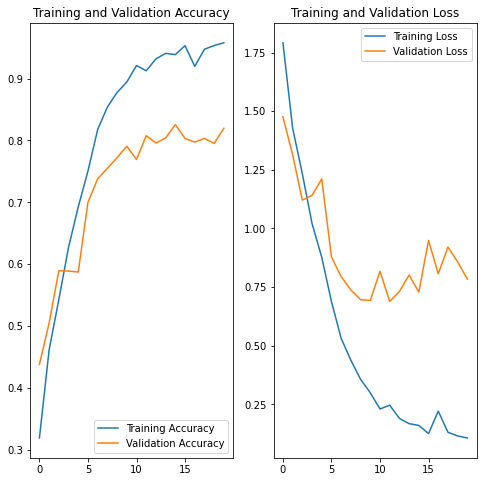

In [14]:
#Training Result Visualization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plot shows that the training accuracy increases linearly over time, whereas validation accuracy stalled ~55-60% in training process, Also the differecne in Training and validation accuracy points to overfitting.

In [15]:
#Agumenting the model to over come the overfitting
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

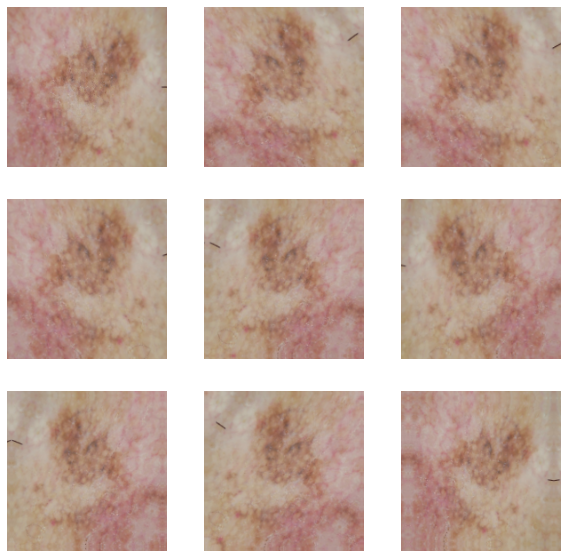

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [17]:
#Create the model, compile and train the model
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
# training the Model 
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 63s 358ms/step - loss: 1.7976 - accuracy: 0.3136 - val_loss: 1.5921 - val_accuracy: 0.3972
Epoch 2/20
169/169 [==============================] - 60s 355ms/step - loss: 1.5009 - accuracy: 0.4273 - val_loss: 1.4312 - val_accuracy: 0.4432
Epoch 3/20
169/169 [==============================] - 62s 365ms/step - loss: 1.3525 - accuracy: 0.4803 - val_loss: 1.4344 - val_accuracy: 0.4514
Epoch 4/20
169/169 [==============================] - 63s 374ms/step - loss: 1.3022 - accuracy: 0.5124 - val_loss: 1.4251 - val_accuracy: 0.4603
Epoch 5/20
169/169 [==============================] - 65s 387ms/step - loss: 1.2132 - accuracy: 0.5376 - val_loss: 1.2840 - val_accuracy: 0.4915
Epoch 6/20
169/169 [==============================] - 66s 390ms/step - loss: 1.1195 - accuracy: 0.5723 - val_loss: 1.3860 - val_accuracy: 0.4974
Epoch 7/20
169/169 [==============================] - 65s 384ms/step - loss: 1.0527 - accuracy: 0.6100 - val_loss: 1.3074 - val_ac

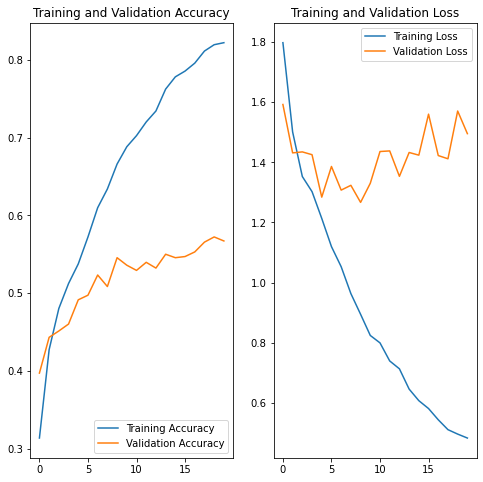

In [20]:
# Visulazing the result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

With change in model the overfiiting redueced to a bit, howevere there still some differecnes

In [21]:
# Finding distribution of class in trianing dataset
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [22]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,data\Train\actinic keratosis\ISIC_0025780.jpg,actinic keratosis
1,data\Train\actinic keratosis\ISIC_0025803.jpg,actinic keratosis
2,data\Train\actinic keratosis\ISIC_0025825.jpg,actinic keratosis
3,data\Train\actinic keratosis\ISIC_0025953.jpg,actinic keratosis
4,data\Train\actinic keratosis\ISIC_0025957.jpg,actinic keratosis
...,...,...
2234,data\Train\vascular lesion\ISIC_0033844.jpg,vascular lesion
2235,data\Train\vascular lesion\ISIC_0033969.jpg,vascular lesion
2236,data\Train\vascular lesion\ISIC_0033991.jpg,vascular lesion
2237,data\Train\vascular lesion\ISIC_0034196.jpg,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


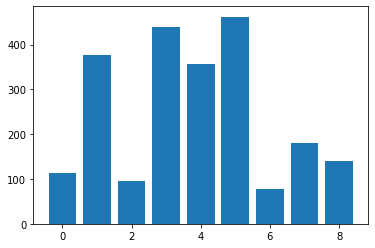

In [23]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

- Class 6 and 2 have least number of sampels
- Class 5 and 3 dominated in terms of image percentage.
This class imbalance need to be rectified to get more accuarte predictions

In [24]:
path_to_training_dataset="data/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to data/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20C81033CD0>: 100%|███████████| 500/500 [00:02<00:00, 211.06 Samples/s]


Initialised with 376 image(s) found.
Output directory set to data/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20C810544F0>: 100%|███████████| 500/500 [00:02<00:00, 200.20 Samples/s]


Initialised with 95 image(s) found.
Output directory set to data/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20C801E5490>: 100%|███████████| 500/500 [00:02<00:00, 208.63 Samples/s]


Initialised with 438 image(s) found.
Output directory set to data/Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x20C8A716A30>: 100%|█| 500/500 [00:12<00:00, 38.73 Sa


Initialised with 357 image(s) found.
Output directory set to data/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=2583x2096 at 0x20C84AA5E50>: 100%|██████████| 500/500 [00:11<00:00, 42.31 Samples/s]


Initialised with 462 image(s) found.
Output directory set to data/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20C80282100>: 100%|█| 500/500 [00:02<00:00, 203.82 Sa


Initialised with 77 image(s) found.
Output directory set to data/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x20C8103B1C0>: 100%|███████████| 500/500 [00:05<00:00, 94.99 Samples/s]


Initialised with 181 image(s) found.
Output directory set to data/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20C80F544C0>: 100%|█| 500/500 [00:02<00:00, 198.30 Sa


Initialised with 139 image(s) found.
Output directory set to data/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20C80497D30>: 100%|███████████| 500/500 [00:02<00:00, 204.72 Samples/s]


In [25]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


In [26]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_11f0fb8b-0b1b-42d8-97ce-cbb8ae7cf6b6.jpg',
 'data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_196d22a9-53ae-434d-8dd8-11fb352cc7c5.jpg',
 'data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_54f27077-4ab4-4cad-9188-b160d7534d83.jpg',
 'data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_58841cf7-aa52-4bb0-8752-d1370c971904.jpg',
 'data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6138933f-b120-489a-aa16-c94d00c2320f.jpg',
 'data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_66307dff-5c7d-42c7-b8f3-3d0a88e10714.jpg',
 'data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_c1622960-9659-4a26-9874-5f3e35d68673.jpg',
 'data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_354a6851-5c

In [27]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [28]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [29]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [30]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

In [31]:
# Train the model data  created using augmentor
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [32]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [33]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 110s 354ms/step - loss: 1.6680 - accuracy: 0.3595 - val_loss: 1.2725 - val_accuracy: 0.5100
Epoch 2/20
281/281 [==============================] - 98s 347ms/step - loss: 1.1765 - accuracy: 0.5664 - val_loss: 1.0498 - val_accuracy: 0.6012
Epoch 3/20
281/281 [==============================] - 95s 338ms/step - loss: 0.9090 - accuracy: 0.6713 - val_loss: 0.8151 - val_accuracy: 0.7161
Epoch 4/20
281/281 [==============================] - 99s 352ms/step - loss: 0.6988 - accuracy: 0.7489 - val_loss: 0.6833 - val_accuracy: 0.7668
Epoch 5/20
281/281 [==============================] - 95s 337ms/step - loss: 0.5141 - accuracy: 0.8188 - val_loss: 0.5922 - val_accuracy: 0.8006
Epoch 6/20
281/281 [==============================] - 93s 332ms/step - loss: 0.3788 - accuracy: 0.8681 - val_loss: 0.5013 - val_accuracy: 0.8358
Epoch 7/20
281/281 [==============================] - 89s 316ms/step - loss: 0.3065 - accuracy: 0.8896 - val_loss: 0.3965 - val_a

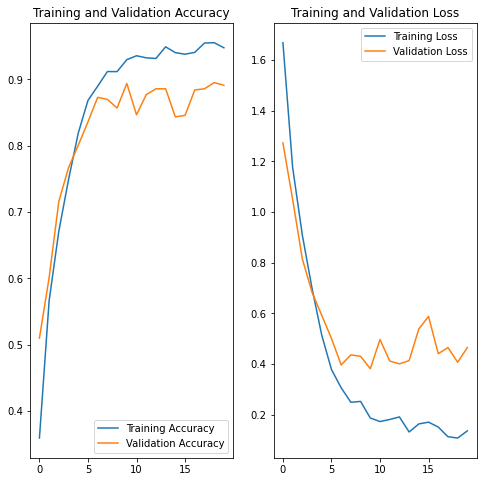

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- IAgumentation overcomes the problem of overfitting 
- Solving the class imbalance problem removes the underfititng